In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatch
import seaborn as sns
import numpy as np
import pandas as pd

Kaggle Nedir? 
Birçok farklı konuda veri setlerine sahip bir depodur. Gerçek dünyadaki veri setlerini inceleyebileceğimiz ve problemleri çözmek için yarışabileceğimiz bir platformdur.

Kaggle'de birçok veri seti için sütunların açıklaması net bir şekilde verilir. 

Veri kümesinin hangi amaçla kullanılabileceğinden kısaca bahsedilir. Aynı zamanda veri seti kullanılabilirlik, lisans, dosya tipi, dosya boyutu ve etiketler gibi filtreler içerir. 

Veri setleri dışında gerçek dünya verileri ile ilgili yarışmalar da yapılır.

Discussions adı altındaki forum kısmı ile hem duyurular hem ilginç tartışmalar için ortam sunar.

In [54]:
'''Seçilen veri seti günceldir. Superstore veri kümesi, küresel bir mağazadaki satışlar ve siparişler hakkında bilgi
 içeren kapsamlı bir veri kümesi olup Veri analizi ve görselleştirme görevleri için kullanılabilecek uyumlu bir kaynaktır.
'''
base_url = "../data/superstore/"
superstore = base_url + "superstore.csv"

In [55]:
store=pd.read_csv(superstore)

In [56]:
store.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [57]:
'''Data Cleaning
-Eksik değerlerin incelenmesi
-Anlamsız ve aykırı veri tespiti (boxplot gibi yöntem kullanarak gösterebilir)
-Anlamsız veri varsa düzeltme
-Kopya veri kontrolü yapma
-Gereksiz verileri kaldırma
-Değişkenlerin dağılımını anlamak için görselleştirmeler oluşturma
- veri görselleştirme ile keşifsel veri analizi
-Korelasyon ve heatmaps
- Analiz iç görüsü elde etme
-Hangi ilginç kalıp ve eğitimler keşfedildi?'''

'Data Cleaning\n-Eksik değerlerin incelenmesi\n-Anlamsız ve aykırı veri tespiti (boxplot gibi yöntem kullanarak gösterebilir)\n-Anlamsız veri varsa düzeltme\n-Kopya veri kontrolü yapma\n-Gereksiz verileri kaldırma\n-Değişkenlerin dağılımını anlamak için görselleştirmeler oluşturma\n- veri görselleştirme ile keşifsel veri analizi\n-Korelasyon ve heatmaps\n- Analiz iç görüsü elde etme\n-Hangi ilginç kalıp ve eğitimler keşfedildi?'

In [58]:
eksik_degerler = store.isnull()

# Her sütundaki eksik değer sayısını göstermek için kullanıldı
print(eksik_degerler.sum())

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64


In [59]:
#Veri formatlarını kontrol etmek için:
print(store.dtypes)

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object


In [60]:
df=pd.DataFrame(store)

In [61]:
'''Bu veride veri formatında sadece tarihi göstereceğim şekilde (Saatsiz) bir format
düzenleme yapmak istiyorum. 
'''
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])
#Saati kaldırma işlemini burada yapıyorum
df['Ship.Date']=df['Ship.Date'].dt.date
df['Ship.Date']

0        2011-01-09
1        2011-01-26
2        2011-08-09
3        2011-08-09
4        2011-10-03
            ...    
51285    2014-12-04
51286    2014-12-04
51287    2014-12-21
51288    2014-12-26
51289    2014-12-30
Name: Ship.Date, Length: 51290, dtype: object

In [62]:
#Kopya veri var mı?
kopya_veri = df[df.duplicated()]

print("Kopya veriler:")
print(kopya_veri)
#kopya veri kaldırma
df.drop_duplicates()

Kopya veriler:
Empty DataFrame
Columns: [Category, City, Country, Customer.ID, Customer.Name, Discount, Market, 记录数, Order.Date, Order.ID, Order.Priority, Product.ID, Product.Name, Profit, Quantity, Region, Row.ID, Sales, Segment, Ship.Date, Ship.Mode, Shipping.Cost, State, Sub.Category, Year, Market2, weeknum]
Index: []

[0 rows x 27 columns]


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,69,Corporate,2014-12-04,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,1,2014-12-03 00:00:00.000,CA-2014-109701,...,9,Corporate,2014-12-04,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,1,2014-12-18 00:00:00.000,CA-2014-106964,...,12,Home Office,2014-12-21,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,1,2014-12-25 00:00:00.000,CA-2014-145219,...,90,Home Office,2014-12-26,First Class,15.95,California,Binders,2014,North America,52


In [63]:
#Kaldırmak istenilen sütun için kullanılabilir
df = df.drop(columns=['Market'])


In [64]:
df

,Category,City,Country,Customer.ID,Customer.Name,Discount,记录数,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,1,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,1,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,1,2014-12-03 00:00:00.000,CA-2014-109701,High,...,69,Corporate,2014-12-04,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,1,2014-12-03 00:00:00.000,CA-2014-109701,High,...,9,Corporate,2014-12-04,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,1,2014-12-18 00:00:00.000,CA-2014-106964,Medium,...,12,Home Office,2014-12-21,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,1,2014-12-25 00:00:00.000,CA-2014-145219,Critical,...,90,Home Office,2014-12-26,First Class,15.95,California,Binders,2014,North America,52


In [65]:
# Veri keşfi için: 
   
print(df.info())      


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   记录数             51290 non-null  int64  
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row.ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment         51290 non-null 

In [66]:
print(df.describe())

           Discount      记录数        Profit      Quantity       Row.ID  \
count  51290.000000  51290.0  51290.000000  51290.000000  51290.00000   
mean       0.142908      1.0     28.610982      3.476545  25645.50000   
std        0.212280      0.0    174.340972      2.278766  14806.29199   
min        0.000000      1.0  -6599.978000      1.000000      1.00000   
25%        0.000000      1.0      0.000000      2.000000  12823.25000   
50%        0.000000      1.0      9.240000      3.000000  25645.50000   
75%        0.200000      1.0     36.810000      5.000000  38467.75000   
max        0.850000      1.0   8399.976000     14.000000  51290.00000   

              Sales  Shipping.Cost          Year       weeknum  
count  51290.000000   51290.000000  51290.000000  51290.000000  
mean     246.498440      26.375818   2012.777208     31.287112  
std      487.567175      57.296810      1.098931     14.429795  
min        0.000000       0.002000   2011.000000      1.000000  
25%       31.0000

In [67]:
#Veri setinde sütun adı farklı alfabeyle yazılmış sütun ismini değiştirme :
df.rename(columns={'记录数': 'Records'}, inplace=True)
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Records,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,1,2011-01-07 00:00:00.000,CA-2011-130813,High,...,19,Consumer,2011-01-09,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,...,19,Consumer,2011-01-26,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,21,Consumer,2011-08-09,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,...,111,Consumer,2011-08-09,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,1,2011-09-29 00:00:00.000,CA-2011-146969,High,...,6,Consumer,2011-10-03,Standard Class,1.32,California,Paper,2011,North America,40


Veri Görselleştirme

<Axes: xlabel='Sales', ylabel='Count'>

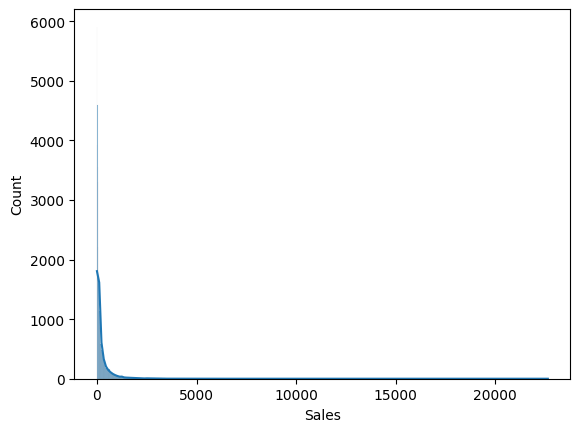

In [68]:

#Histogram: Sürekli değerlerin dağılımını görselleştirmek için kullanılır
sns.histplot(data=store, x='Sales',kde=True)

<Axes: xlabel='Sales', ylabel='Profit'>

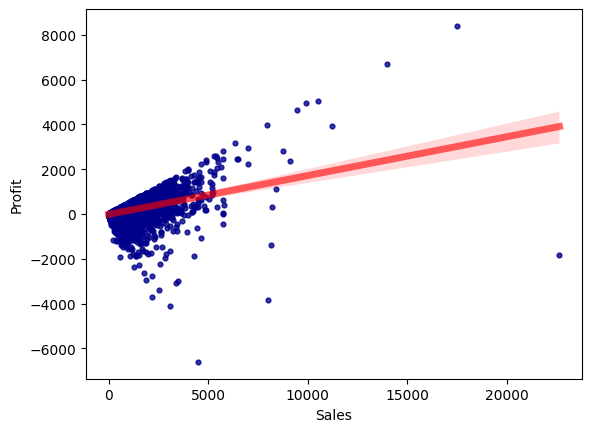

In [69]:
#sns.regplot() fonksiyonu, scatter plot üzerine bir regresyon çizgisi ekler. Regresyon çizgisi, iki değişken arasındaki ilişkiyi gösterir
sns.regplot(
    x=store['Sales'],
    y=store['Profit'],
    marker="o",
    line_kws={
        "color":"red",
        "alpha":0.6,
        "lw":5
    },
    scatter_kws={
        "color":"darkblue",
        "s":12
    }
    )
#Eğer regresyon çizgisi sağa doğru bir eğim gösteriyorsa, bu, bir değişkenin artarken diğer değişkenin de arttığını gösterir (artış ilişkisi).

C:\Users\sevgi\AppData\Local\Temp\ipykernel_14100\3987722007.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafik.set_xticklabels(grafik.get_xticklabels(), rotation=45)


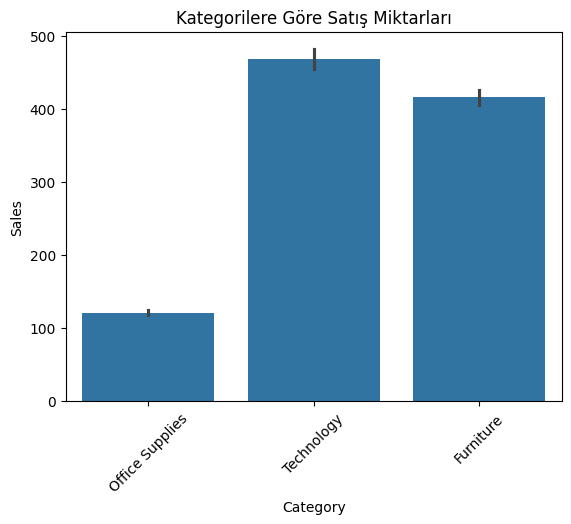

In [70]:
#Kategorilere göre satış miktarlarına gösteren grafik 
#Barplot çizimi
grafik=sns.barplot(x='Category', y='Sales', data=df)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Kategorilere Göre Satış Miktarları')
# Güzel bir görünüm için X ekseni etiketlerini döndürme
grafik.set_xticklabels(grafik.get_xticklabels(), rotation=45)
plt.show()

C:\Users\sevgi\AppData\Local\Temp\ipykernel_14100\3798268697.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafik_ship.set_xticklabels(grafik_ship.get_xticklabels(), rotation=45)


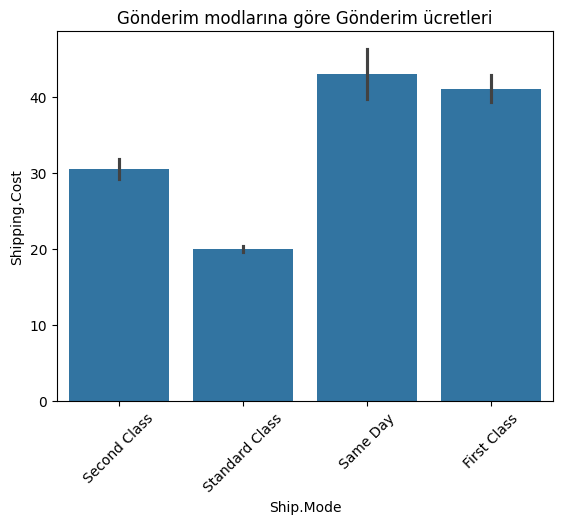

In [71]:
#Gönderim modlarına göre gönderim ücretlerini gösteren grafik
#Barplot çizimi
grafik_ship=sns.barplot(x='Ship.Mode', y='Shipping.Cost', data=store)
plt.xlabel('Ship.Mode')
plt.ylabel('Shipping.Cost')
plt.title('Gönderim modlarına göre Gönderim ücretleri')
# X ekseni etiketlerini döndürme
grafik_ship.set_xticklabels(grafik_ship.get_xticklabels(), rotation=45)
plt.show()

En çok satılan alt kategori:  Standard Class


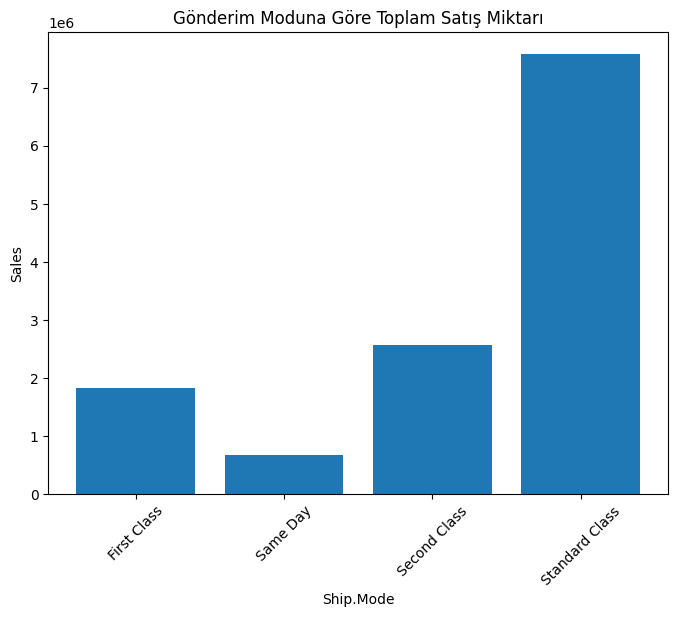

In [72]:
toplam_satis_segment = store.groupby('Ship.Mode')['Sales'].sum().reset_index()

#En çok satılan alt kategoriyi bulalım
en_cok_satilan = toplam_satis_segment[toplam_satis_segment['Sales'] == toplam_satis_segment['Sales'].max()]

print("En çok satılan alt kategori: ", en_cok_satilan['Ship.Mode'].values[0])

#Görselleştirme - Barplot ile ürün alt kategorilerinin satış miktarlarını gösterme
plt.figure(figsize=(8, 6))
plt.bar(toplam_satis_segment['Ship.Mode'], toplam_satis_segment['Sales'])
plt.xlabel('Ship.Mode')
plt.ylabel('Sales')
plt.title('Gönderim Moduna Göre Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.show()

In [73]:
print(df.columns)

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Records', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')


'Bu fonksiyon, veri noktalarının dağılımını gösterirken aynı zamanda \n bu noktalar arasındaki ilişkiyi temsil etmek üzere bir regresyon çizgisi ekler. '

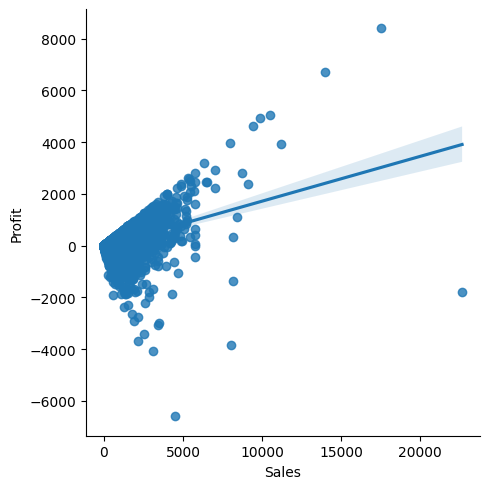

In [74]:
sns.lmplot(
    x='Sales',
    y='Profit',
    data=store,
   
)
'''Bu fonksiyon, veri noktalarının dağılımını gösterirken aynı zamanda 
 bu noktalar arasındaki ilişkiyi temsil etmek üzere bir regresyon çizgisi ekler. '''

<Axes: xlabel='Category', ylabel='Sales'>

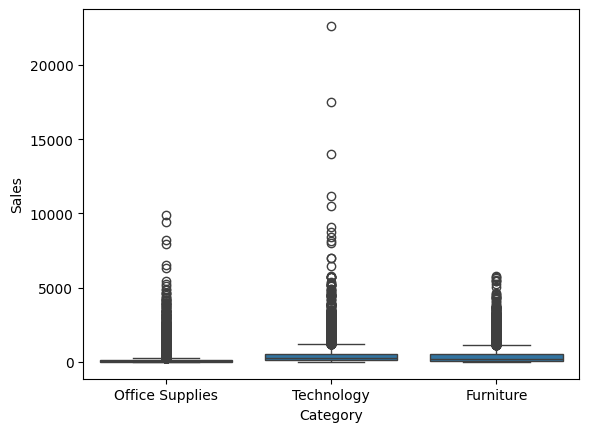

In [75]:
#Kategorilere göre satışı görselleştirmek için:
sns.boxplot(x=store['Category'],y=store['Sales'])


C:\Users\sevgi\AppData\Local\Temp\ipykernel_14100\951233365.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafik_box.set_xticklabels(grafik.get_xticklabels(), rotation=45)


[Text(0, 0, 'Office Supplies'),
 Text(1, 0, 'Technology'),
 Text(2, 0, 'Furniture'),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, '')]

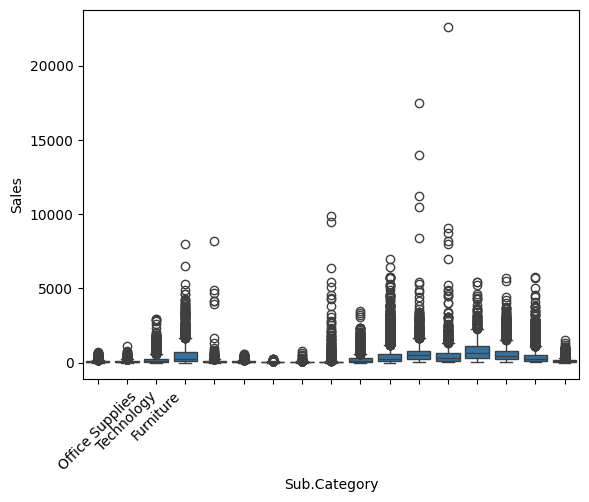

In [76]:
grafik_box=sns.boxplot(x=store['Sub.Category'],y=store['Sales'])
grafik_box.set_xticklabels(grafik.get_xticklabels(), rotation=45)

En çok satılan alt kategori:  Phones


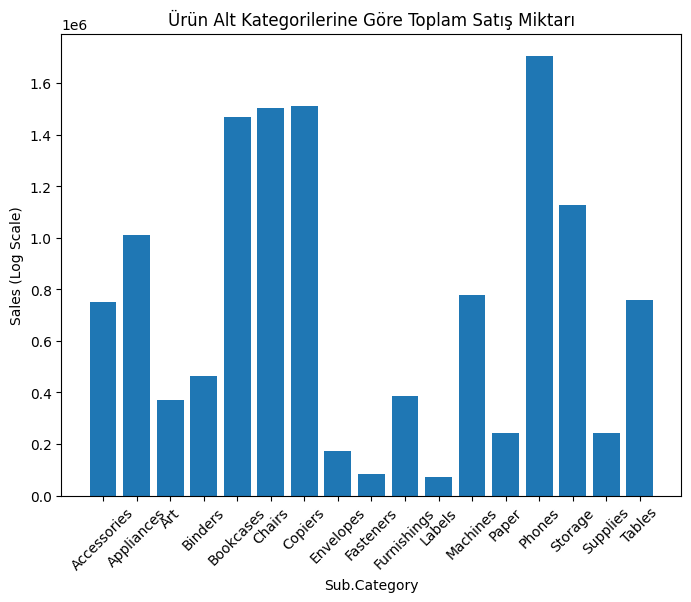

In [77]:
#En çok satılan ürün alt kategorisi Bulmak için:
toplam_satis = df.groupby('Sub.Category')['Sales'].sum().reset_index()

# En çok satılan alt kategoriyi bulma
en_cok_satilan = toplam_satis[toplam_satis['Sales'] == toplam_satis['Sales'].max()]

print("En çok satılan alt kategori: ", en_cok_satilan['Sub.Category'].values[0])

# Görselleştirme - Barplot ile ürün alt kategorilerinin satış miktarlarını gösterme
plt.figure(figsize=(8, 6))
plt.bar(toplam_satis['Sub.Category'], toplam_satis['Sales'])
plt.xlabel('Sub.Category')
plt.ylabel('Sales (Log Scale)')
plt.title('Ürün Alt Kategorilerine Göre Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.show()

En çok satılan alt kategori:  Consumer


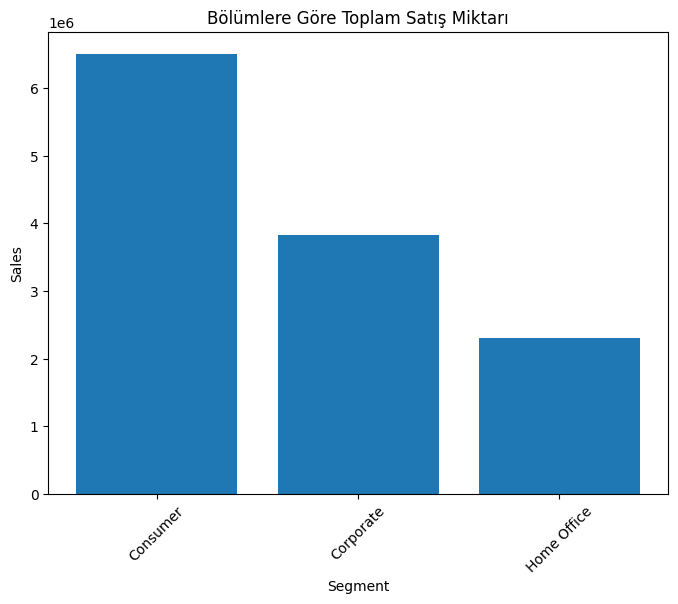

In [78]:
toplam_satis_segment = store.groupby('Segment')['Sales'].sum().reset_index()

#En çok satılan alt kategoriyi bulalım
en_cok_satilan = toplam_satis_segment[toplam_satis_segment['Sales'] == toplam_satis_segment['Sales'].max()]

print("En çok satılan alt kategori: ", en_cok_satilan['Segment'].values[0])

#Görselleştirme - Barplot ile ürün alt kategorilerinin satış miktarlarını gösterme
plt.figure(figsize=(8, 6))
plt.bar(toplam_satis_segment['Segment'], toplam_satis_segment['Sales'])
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Bölümlere Göre Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.show()

<Axes: >

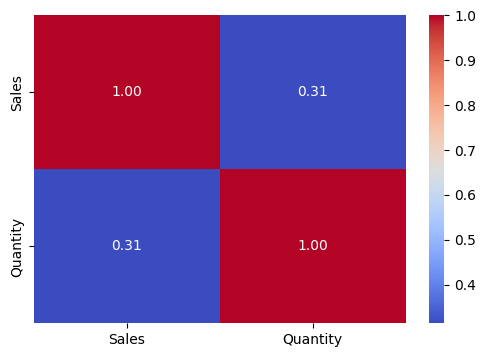

In [79]:
#İki ilişkili olabilecek değer için heatmap:
korelasyon_matrisi = store[['Sales', 'Quantity']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt=".2f")


In [80]:
#Hangi sayısal sütunları kullanabileceğimi analiz etmek için sayısal değere sahip sütun bilgilerini liste şeklinde incelendi
sayisal_sutunlar = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(sayisal_sutunlar)



['Discount', 'Records', 'Profit', 'Quantity', 'Row.ID', 'Sales', 'Shipping.Cost', 'Year', 'weeknum']


<Axes: >

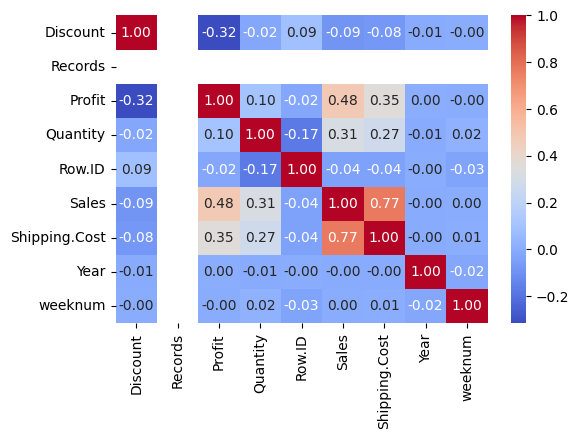

In [81]:
#Burada bütun sayısal değerlerle bir heatmap yaptım fakat bu ilgisizleri de içerdiği için yorumlanabilir değil.

korelasyon_matrisi = df[['Discount', 'Records', 'Profit', 'Quantity', 'Row.ID', 'Sales', 'Shipping.Cost', 'Year', 'weeknum']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt=".2f")

<Axes: >

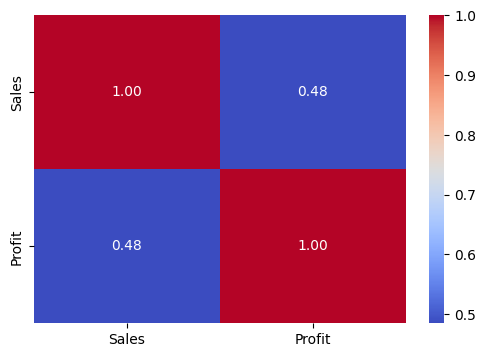

In [82]:
#İlgili olabileceğini düşündüğüm sütunlar arasında çalışıldı
korelasyon_matrisi = store[['Sales','Profit']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(korelasyon_matrisi, annot=True, cmap='coolwarm', fmt=".2f")

Bu analiz için bir yorum yapmak gerekirse 1'e yaklaşan pozitif bir korelasyon, iki değişken arasında güçlü ve doğrusal bir ilişki olduğunu gösteir. 0.48 gibi bir değer ise orta değerde pozitif bir ilişki olduğunu gösterir. 

Elde edebileceğimiz insights: 

Ortak yönde devam eden bir artış söz konusu. Yani, satışlar arttıkça kar da genellikle artar veya kar arttıkça satışlar da genellikle artar.

Performans analizine bakarsak yüksek satış yapan dönemlerde daha fazla kar elde edileceği gözlemlenebilir.



<Axes: >

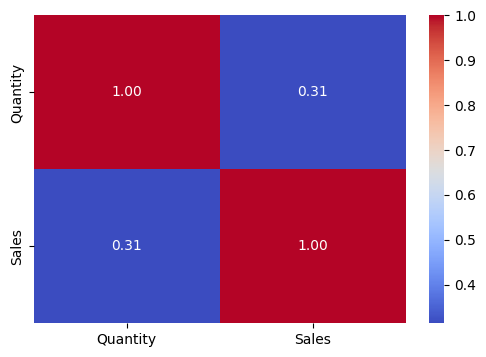

In [83]:
korelasyon_matrisi_q = store[['Quantity','Sales']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(korelasyon_matrisi_q, annot=True, cmap='coolwarm', fmt=".2f")

Quantity ve Sales arasında pozitif orta düzey ilişki vardır.

In [84]:
#Kategorik değerlerden bir liste oluşturuyorum
categorical_columns = ['Category', 'City', 'Country', 'Market', 'Order.Priority', 'Region', 'Segment', 'Ship.Mode', 'State', 'Sub.Category', 'Market2']

for column in categorical_columns:
    print(df[column].value_counts())

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: count, dtype: int64
City
New York City            915
Los Angeles              747
Philadelphia             537
San Francisco            510
Santo Domingo            443
                        ... 
Hadera                     1
Morley                     1
Villeneuve-la-Garenne      1
Torremolinos               1
Redwood City               1
Name: count, Length: 3636, dtype: int64
Country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
South Sudan         2
Chad                2
Swaziland           2
Eritrea             2
Bahrain             2
Name: count, Length: 147, dtype: int64


KeyError: 'Market'

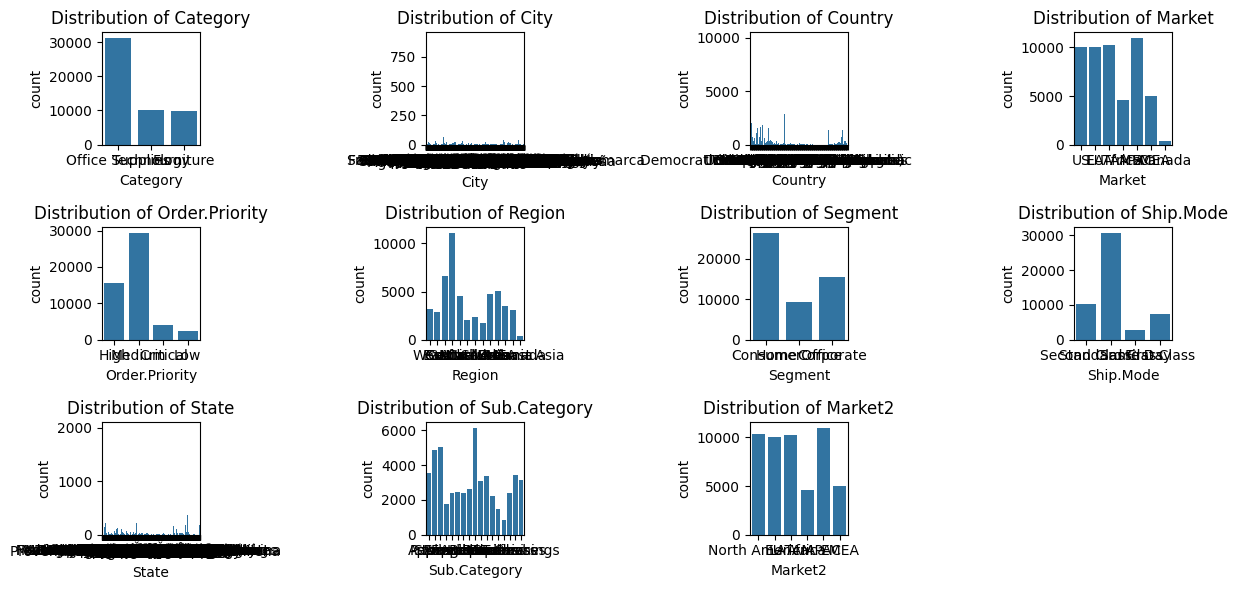

In [ ]:
#Her bir kategorik değişkenin dağılımını göstermek için bir countplot (sayım grafiği) oluşturuyorum
plt.figure(figsize=(12, 6))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

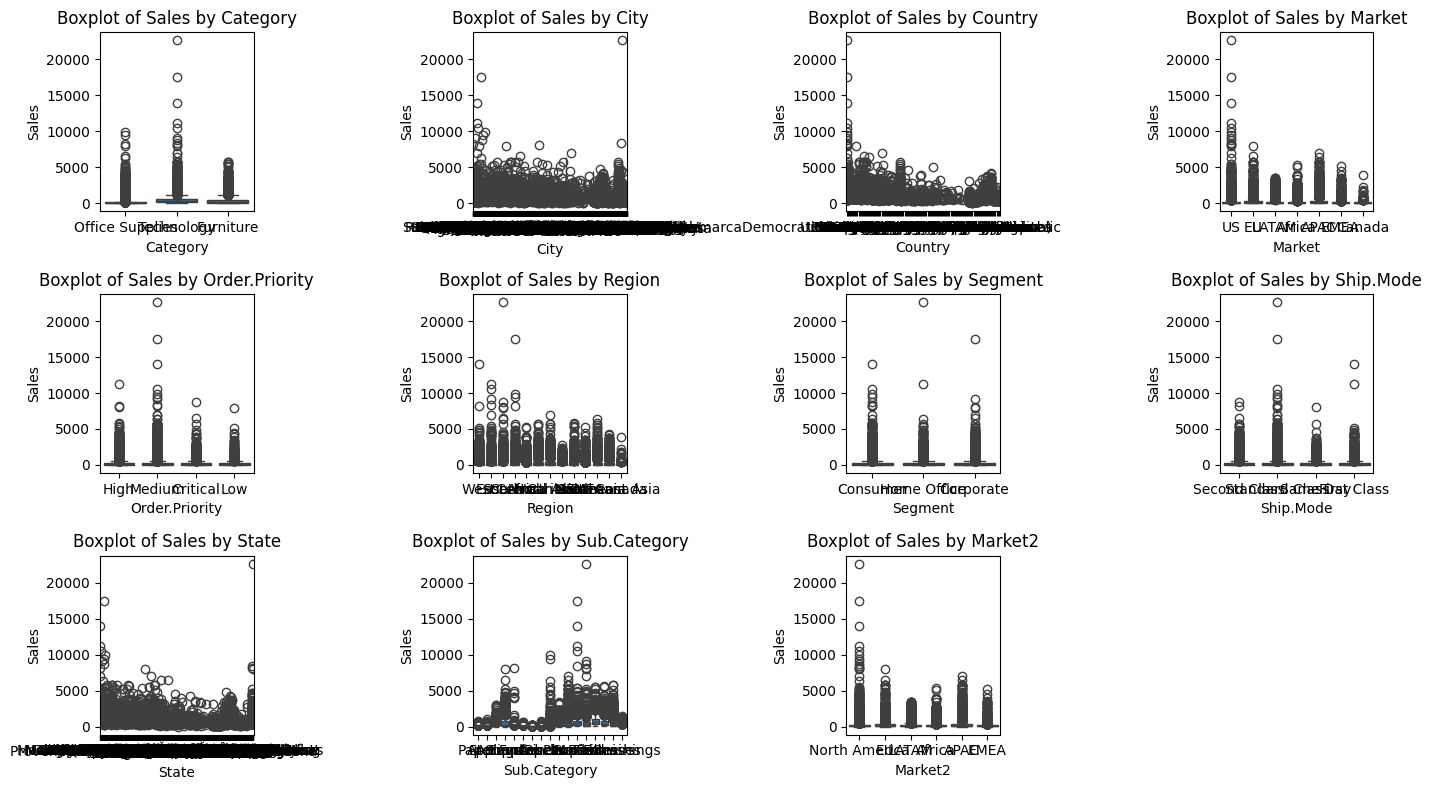

In [ ]:
#veri setindeki her bir kategorik değişkenin Sales (Satışlar) değişkenine göre boxplot'larını oluşturuyorum.
plt.figure(figsize=(14, 8))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x=column, y='Sales')
    plt.title(f'Boxplot of Sales by {column}')

plt.tight_layout()
plt.show()
#Bütün grafikleri bir arada aldığımızda takip edilebilir olması mümkün görünmüyor ama grafikleri toplu görüp yeni çıkarımlar yapabilmemiz açısından tercih edilebilir.
#Daha küçük bir veri setinde bu yöntem daha gözlemlenebilir olur

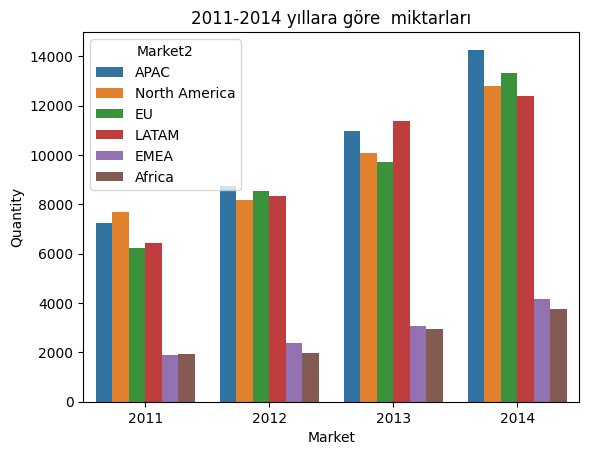

In [ ]:
#Yıllara göre satış miktarı barplot grafiği
yillara_göre_satis = df.groupby(['Market2','Year']).agg({'Sales':'sum','Quantity':'sum'}).reset_index()
yillara_göre_satis.sort_values(by='Sales', ascending=False, inplace=True)

sns.barplot(data=yillara_göre_satis, x='Year', y='Quantity', hue='Market2')
plt.title('2011-2014 yıllara göre  miktarları')
plt.xlabel('Market')
plt.ylabel('Quantity')
plt.show()

In [ ]:
#Grafiği yorumladığımızda 2011'den 2014 yılına kadar miktarda artış yaşanmıştır.


In [ ]:

#Yıllara göre gruplama yaparak her bir yıl için kategorilere göre satışları hesaplama
toplam_satis_yil = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()


In [ ]:

#Her bir yılın en çok satılan alt kategorisini bulma
en_cok_satilan_yil = toplam_satis_yil.loc[toplam_satis_yil.groupby('Year')['Sales'].idxmax()]



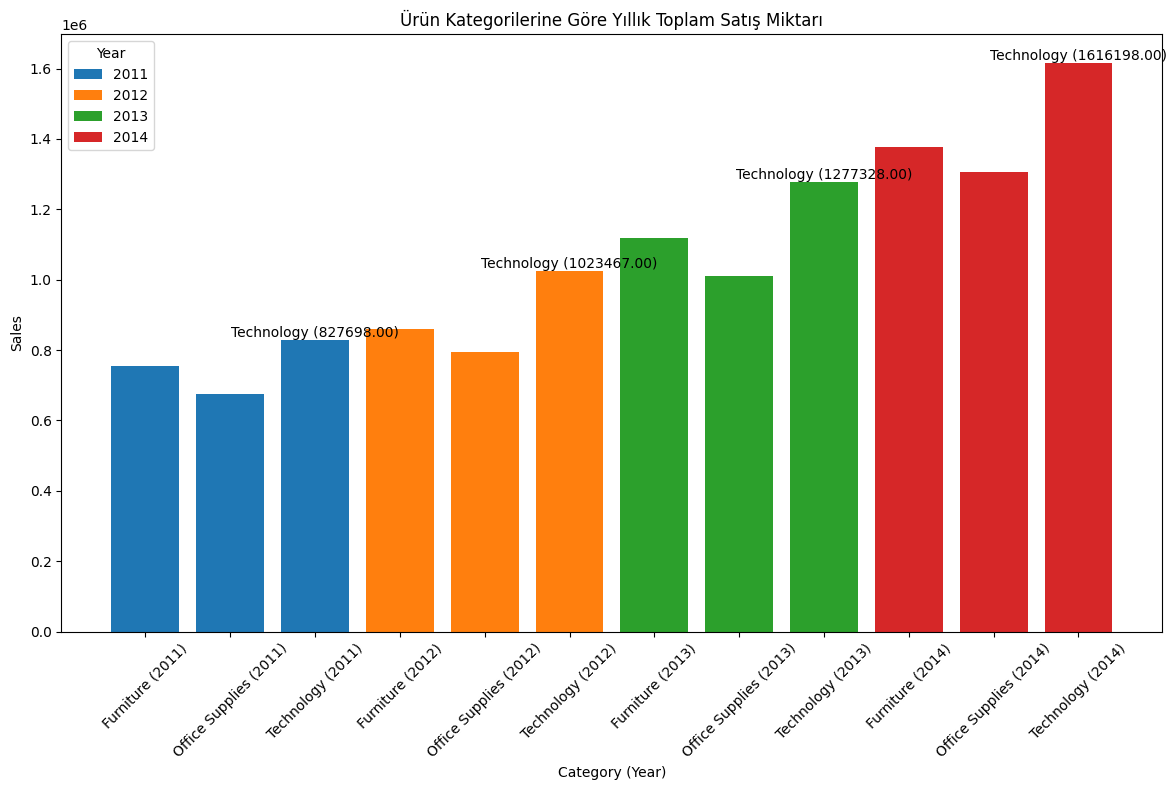

In [ ]:
#Bar grafiği oluşturma
plt.figure(figsize=(12, 8))

#Her bir yılın alt kategorilere göre satışlarını tek bir grafikte karşılaştırma
for year in toplam_satis_yil['Year'].unique():
    data = toplam_satis_yil[toplam_satis_yil['Year'] == year]
    plt.bar(data['Category'] + f' ({year})', data['Sales'], label=str(year))

# Her bir yılın en çok satılan kategorisini belirtme
for index, row in en_cok_satilan_yil.iterrows():
    plt.text(row['Category'] + f' ({row["Year"]})', row['Sales'], f'{row["Category"]} ({row["Sales"]:.2f})', ha='center', va='bottom')

plt.xlabel('Category (Year)')
plt.ylabel('Sales')
plt.title('Ürün Kategorilerine Göre Yıllık Toplam Satış Miktarı')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()